# Data Science Master Degree Capstone Project

## Dataset : Chest X-Ray

## Harmankaranjit Singh Lohiya

## QO38890

In [1]:
# Importing necessary libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating Path to the dataset 

pneumonia_path = r"C:\Users\Karan's\Desktop\Project files\Dataset\PNEUMONIA"
normal_path = r"C:\Users\Karan's\Desktop\Project files\Dataset\NORMAL"

# Loading the images from the dataset

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

pneumonia_images = load_images_from_folder(pneumonia_path)
normal_images = load_images_from_folder(normal_path)

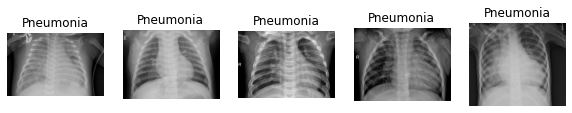

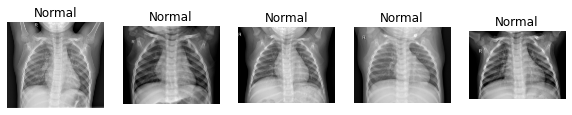

In [5]:
# Displaying some sample images from the dataset

def display_images(images, title):
    plt.figure(figsize=(10,5))
    for i in range(5):  # displaying 5 images from Pneumonia & Normal
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], 'gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

display_images(pneumonia_images, "Pneumonia")
display_images(normal_images, "Normal")

In [3]:
# Generating some basic statistics

pneumonia_img_shapes = [img.shape for img in pneumonia_images]
normal_img_shapes = [img.shape for img in normal_images]

print(f"Average size of pneumonia images: {np.mean(pneumonia_img_shapes, axis=0)}")
print(f"Average size of normal images: {np.mean(normal_img_shapes, axis=0)}")

Average size of pneumonia images: [ 868.33066132 1255.70541082]
Average size of normal images: [1350.21587302 1665.13015873]


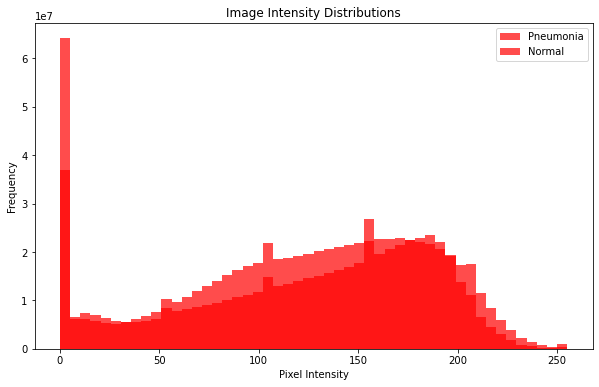

In [4]:
# Image intensity distributions

def plot_intensity_distribution(images, title):
    intensities = [img.ravel() for img in images]
    all_intensities = np.concatenate(intensities)
    plt.hist(all_intensities, bins=50, color='red', alpha=0.7, label=title)
    
plt.figure(figsize=(10,6))
plot_intensity_distribution(pneumonia_images, "Pneumonia")
plot_intensity_distribution(normal_images, "Normal")
plt.legend()
plt.title("Image Intensity Distributions")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


----------------------------------------------------------------